In [1]:
# Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

from lifelines import KaplanMeierFitter

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import the customer data
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") 


In [3]:
# Show the variables in the customer data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Preprocessing:

In [4]:
## Convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

## Change churn varible to a numeric binary variable
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [5]:
# Impute values for the missing values in the TotalCharges column
df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

In [7]:
## Create a list of Categorical Columns
cat_cols= [i  for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID') 

### Survival Analysis Model

<AxesSubplot:xlabel='timeline'>

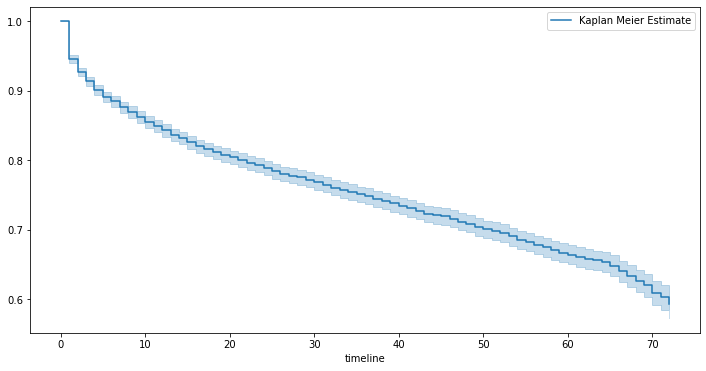

In [8]:
## Create a Kaplan Meier curve to visualize customer survival analysis:

durations = df['tenure'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

## create a kmf object
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create plot
km.plot()